## Hypothesis: photo amount influences adoption speed

In [1]:
import pandas as pd
import numpy as np
# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
# import graphviz
# Scaling with Minmax-scaler
from sklearn.preprocessing import MinMaxScaler

# from ydata_profiling import ProfileReport

# import custom functions
from custom_functions import our_metrics

pd.set_option('display.max_rows', 10)

In [38]:
# plot settings

# custom color palette: 
colors = ['#365b6d', '#41c1ba', '#289dd2', '#6c9286', '#f2f1ec', '#fa9939']
#365b6d - dark blue
#41c1ba - turquoise
#289dd2 - medium blue
#6c9286 - muddy green
#fa9939 - orange 
#f2f1ec - off-white

# Set your custom color palette
custom_palette = sns.set_palette(sns.color_palette(colors))
sns.set_palette(sns.color_palette(colors))
sns.set_style("darkgrid")

# for multiple plots
# sns.despine(left=True, bottom=True)

In [39]:
df = pd.read_csv("../data/petfinder-adoption-prediction/eda/df_eda.csv")

In [40]:
df_combined = df.copy()
df_combined.adoptionspeed = df_combined.adoptionspeed.replace([1,2,3,4],['adopted', 'adopted','adopted','not adopted'])

In [41]:
df_combined.adoptionspeed.value_counts()

adoptionspeed
adopted        10796
not adopted     4197
Name: count, dtype: int64

In [42]:
df.adoptionspeed.value_counts()

adoptionspeed
4    4197
2    4037
1    3500
3    3259
Name: count, dtype: int64

In [43]:
pd.crosstab(df["photoamt"], df["adoptionspeed"],normalize="index")

adoptionspeed,1,2,3,4
photoamt,,,,
0.0,0.170088,0.105572,0.099707,0.624633
1.0,0.224390,0.254634,0.192520,0.328455
2.0,0.240667,0.264098,0.196982,0.298253
3.0,0.253286,0.265233,0.193947,0.287535
4.0,0.249335,0.276449,0.213716,0.260500
...,...,...,...,...
26.0,0.100000,0.200000,0.500000,0.200000
27.0,0.333333,0.166667,0.333333,0.166667
28.0,0.142857,0.000000,0.714286,0.142857


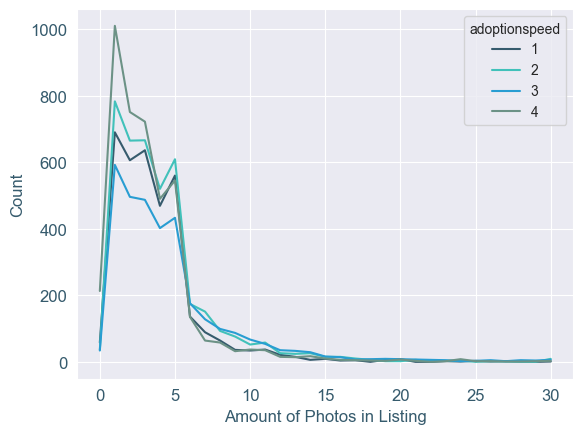

In [ ]:
pd.crosstab(df["photoamt"], df["adoptionspeed"]#,normalize="index"
).plot.line()
plt.xlabel('Amount of Photos in Listing', color='#365b6d', fontsize=12)
plt.ylabel('Count', fontsize=12, color='#365b6d')

#plt.title(' Model', fontsize=28, color='#365b6d', pad=60, y=0.91) 
plt.xticks(color='#365b6d',fontsize=12)
plt.yticks(color='#365b6d', fontsize=12);
#sns.lineplot(x=quantile_idx, y=[0,5])
#plt.savefig('plots/baseline_plot2_without_title.jpg')

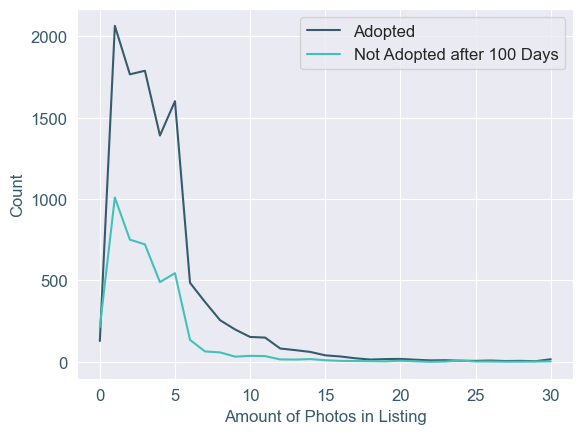

In [69]:
pd.crosstab(df_combined["photoamt"], df_combined["adoptionspeed"]#,normalize="index"
).plot.line()
plt.legend(
#    title='Adoption Speed',
    labels = ['Adopted', 'Not Adopted after 100 Days'],
    fontsize=12,#'x-large',
#    title_fontsize=20#'xx-large'
    )
plt.xlabel('Amount of Photos in Listing', color='#365b6d', fontsize=12);
plt.ylabel('Count', fontsize=12, color='#365b6d');
#plt.title(' Model', fontsize=28, color='#365b6d', pad=60, y=0.91) 
plt.xticks(color='#365b6d',fontsize=12)
plt.yticks(color='#365b6d', fontsize=12);

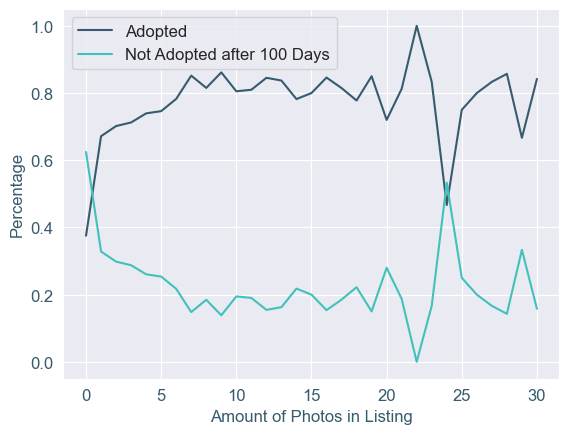

In [81]:
pd.crosstab(df_combined["photoamt"], df_combined["adoptionspeed"],normalize="index"
).plot.line()
plt.legend(
#    title='Adoption Speed',
    labels = ['Adopted', 'Not Adopted after 100 Days'],
    fontsize=12,#'x-large',
#    title_fontsize=20#'xx-large'
    )
plt.xlabel('Amount of Photos in Listing', color='#365b6d', fontsize=12);
plt.ylabel('Percentage', fontsize=12, color='#365b6d');
#plt.title(' Model', fontsize=28, color='#365b6d', pad=60, y=0.91) 
plt.xticks(color='#365b6d',fontsize=12)
plt.yticks(color='#365b6d', fontsize=12);

In [72]:
sns.color_palette()

[(0.21176470588235294, 0.3568627450980392, 0.42745098039215684),
 (0.2549019607843137, 0.7568627450980392, 0.7294117647058823),
 (0.1568627450980392, 0.615686274509804, 0.8235294117647058),
 (0.4235294117647059, 0.5725490196078431, 0.5254901960784314),
 (0.9490196078431372, 0.9450980392156862, 0.9254901960784314),
 (0.9803921568627451, 0.6, 0.2235294117647059)]

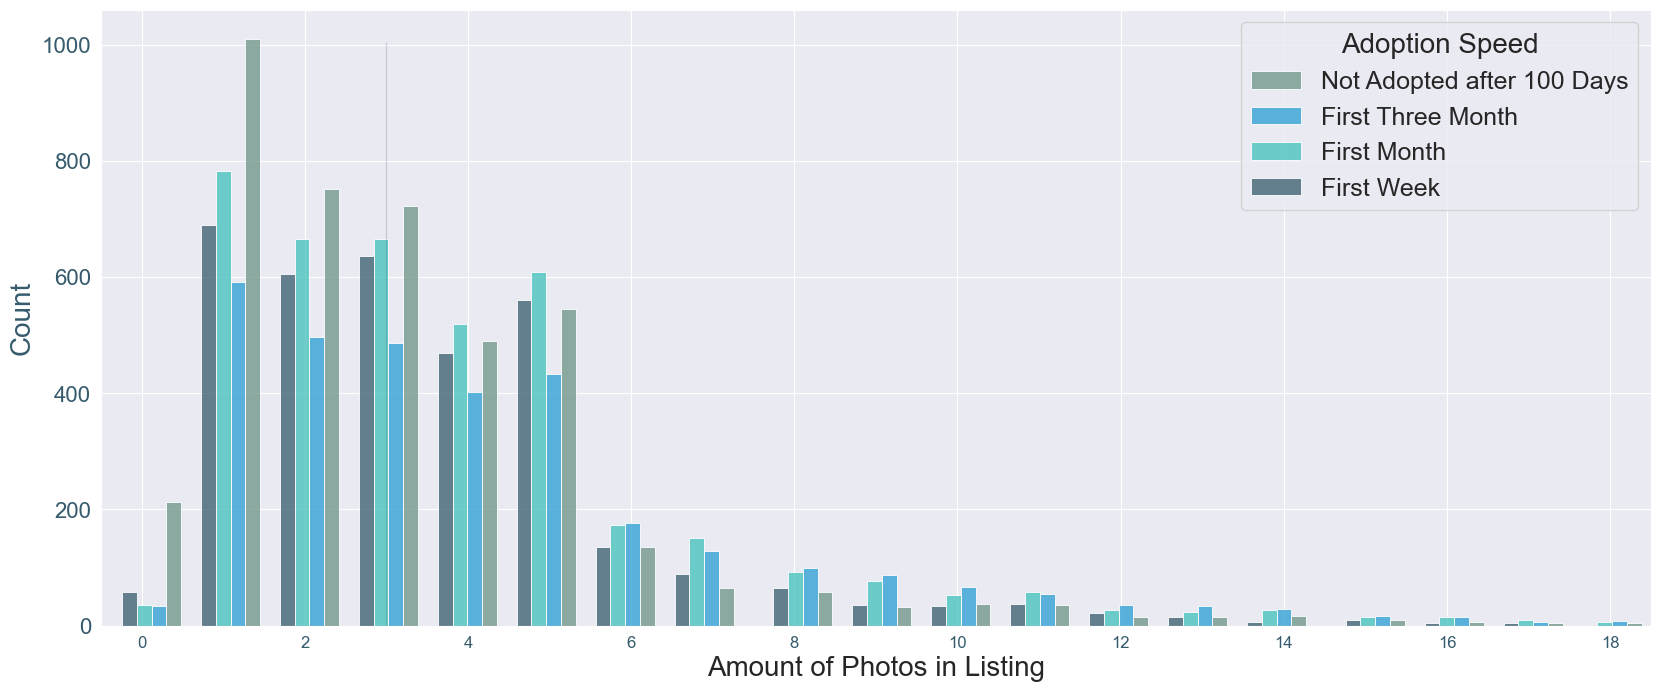

In [91]:
# histplot
fig = plt.figure(figsize=(20,8))
hist = sns.histplot(data=df, x='photoamt', hue='adoptionspeed', palette=['#365b6d', '#41c1ba', '#289dd2', '#6c9286'], multiple='dodge', shrink=3)#, palette=custom_palette, 
#, shrink=1, bins=20 )#bins = np.arange(quantile_idx-84, 1114, 28))# bins=60)#)
#multiple='stack',“layer”, “dodge”, “fill”}
#hist.axvline(x=quantile_idx, color='#671f47', linewidth=2) # '#b86a44', '#671f47', '#a22e54',  '#dabc66'
#plt.xticks(rotation=45)
#plt.subplots_adjust(top=0.90)
#add legend to plot
plt.legend(
    title='Adoption Speed',
    labels = ['Not Adopted after 100 Days','First Three Month','First Month','First Week'],
    fontsize=18,#'x-large',
    title_fontsize=20#'xx-large'
    )
plt.xlabel('Amount of Photos in Listing', fontsize=20);
plt.ylabel('Count', fontsize=20, color='#365b6d');
#plt.title(' Model', fontsize=28, color='#365b6d', pad=60, y=0.91) 
plt.xticks(ticks=np.linspace(0,18,10),color='#365b6d',fontsize=12)
plt.yticks(color='#365b6d', fontsize=16)
sns.lineplot(x=3, y=[0,1020], size=)
#plt.savefig('plots/baseline_plot2_without_title.jpg')
plt.xlim([-0.5, 18.5])
plt.show();

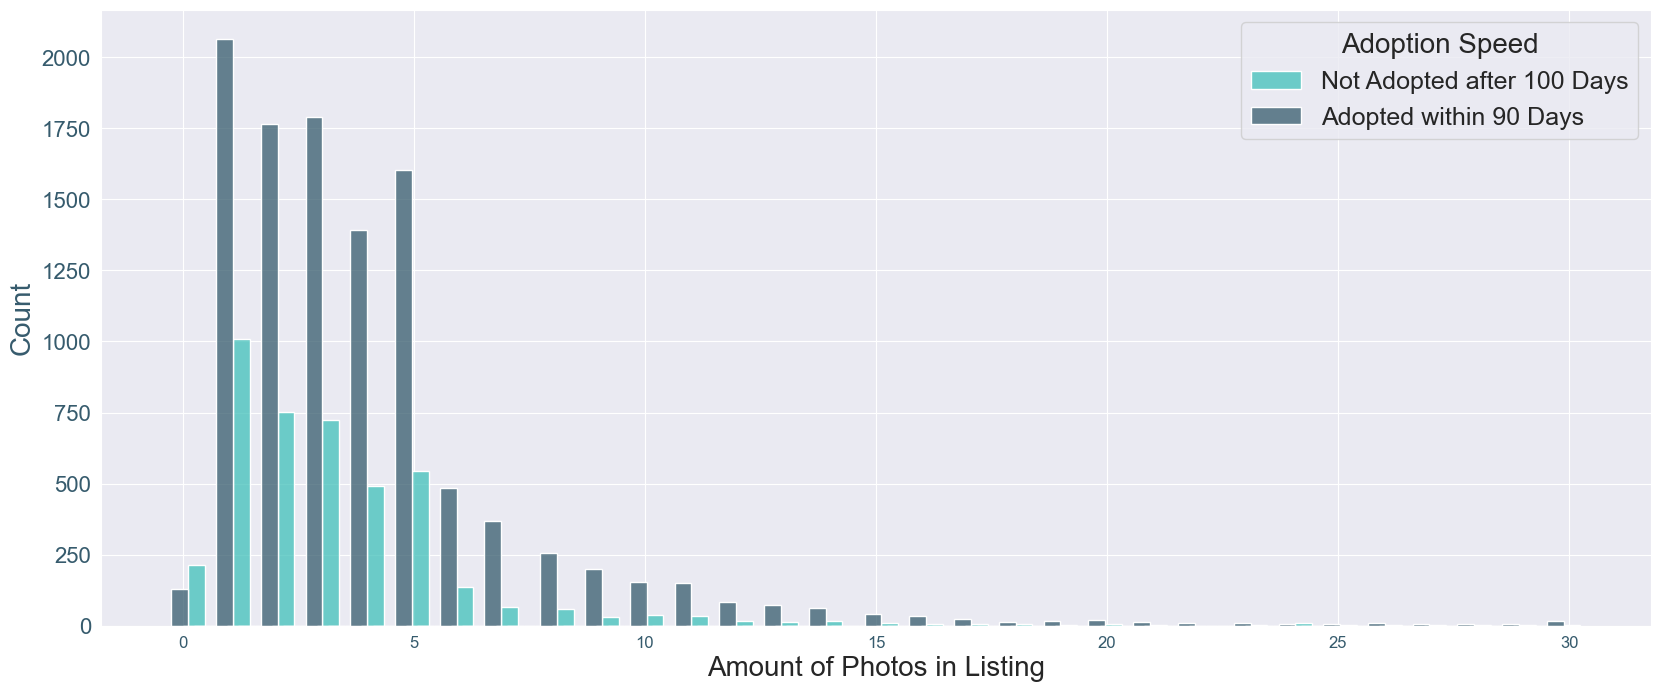

In [73]:
# histplot
fig = plt.figure(figsize=(20,8))
hist = sns.histplot(data=df_combined, x='photoamt', hue='adoptionspeed', palette=custom_palette, multiple='dodge', shrink=3)
#, shrink=1, bins=20 )#bins = np.arange(quantile_idx-84, 1114, 28))# bins=60)#)
#multiple='stack',“layer”, “dodge”, “fill”}
#hist.axvline(x=quantile_idx, color='#671f47', linewidth=2) # '#b86a44', '#671f47', '#a22e54',  '#dabc66'
#plt.xticks(rotation=45)
#plt.subplots_adjust(top=0.90)
#add legend to plot
plt.legend(
    title='Adoption Speed',
    labels = ['Not Adopted after 100 Days','Adopted within 90 Days'],
    fontsize=18,#'x-large',
    title_fontsize=20#'xx-large'
    )
plt.xlabel('Amount of Photos in Listing', fontsize=20);
plt.ylabel('Count', fontsize=20, color='#365b6d');
#plt.title(' Model', fontsize=28, color='#365b6d', pad=60, y=0.91) 
plt.xticks(color='#365b6d',fontsize=12)
plt.yticks(color='#365b6d', fontsize=16)
#sns.lineplot(x=quantile_idx, y=[0,5])
#plt.savefig('plots/baseline_plot2_without_title.jpg')
plt.show();